In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Path to the dataset files

DATASET = 'D:/Canada/University of windsor/Comp-8740-Machine learning and pattern recognition/Final project/dataset/data.csv'
LABELS = 'D:/Canada/University of windsor/Comp-8740-Machine learning and pattern recognition/Final project/dataset/labels.csv'


In [26]:
# Reading dataset

data = pd.read_csv(DATASET)
label = pd.read_csv(LABELS)

x = data.iloc[:, 1:]
y = label.iloc[:, 1:]


In [27]:
from mrmr import mrmr_classif
from sklearn.feature_selection import SelectKBest

scores = mrmr_classif(x, y, K=20)
  
X = x[scores]

X = pd.DataFrame(X, columns = scores)

dataset = pd.concat([X, y], axis=1)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:50<00:00,  5.54s/it]


In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

Y = pd.DataFrame(Y, columns = ['Class'])

In [29]:
# Split the data into train and test data:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

# Training Models

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

SVM = SVC(kernel = 'rbf', random_state = 0)
SVM.fit(X_train, y_train)

RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF.fit(X_train, y_train)



RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [31]:
y_pred = RF.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[90  0  0  0  0]
 [ 0 28  0  0  0]
 [ 0  0 41  0  0]
 [ 0  0  0 40  0]
 [ 0  0  0  0 42]]


1.0

# LIME for Random Forest

In [34]:
from lime import lime_tabular

# LIME has one explainer for all the models
explainer = lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),
                                              categorical_features = ['Class'],
                                              #class_names=['Class'], 
                                              verbose=True, 
                                              mode='regression')

# Select 5th instance

Intercept 2.937113421738313
Prediction_local [-0.39588924]
Right: 0


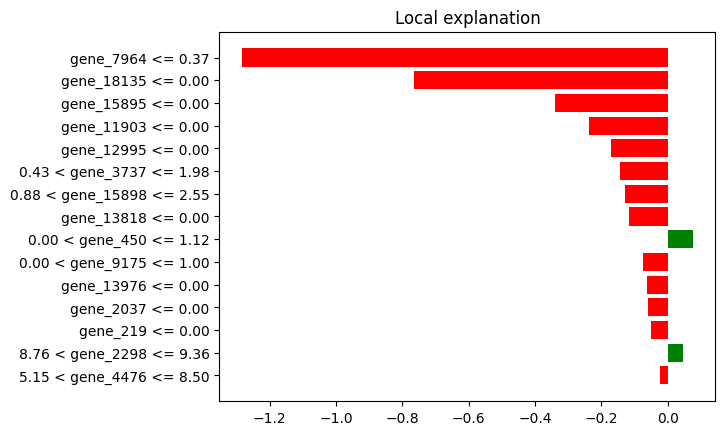

In [37]:
# Choose the 5th instance and use it to predict the results
j = 5
exp = explainer.explain_instance(X_test.values[j], RF.predict, num_features=15)

# Show the predictions
# exp.show_in_notebook(show_table=True)
fig = exp.as_pyplot_figure()

plt.savefig("LIME.png")

# Select 15th instance

In [92]:
# Choose the 15th instance and use it to predict the results
j = 15
exp = explainer.explain_instance(X_test.values[j], RF.predict, num_features=15)

# Show the predictions
exp.show_in_notebook(show_table=True)

C:\Users\dania\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.5150638243949289
Prediction_local [2.0973537]
Right: 3


# Select 25th instance


In [99]:
# Choose the 5th instance and use it to predict the results
j = 6
exp = explainer.explain_instance(X_test.values[j], RF.predict, num_features=15)

# Show the predictions
exp.show_in_notebook(show_table=True)

C:\Users\dania\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 1.2334979350044737
Prediction_local [0.1601167]
Right: 0


# LIME for SVM

# Select 5th instance

Intercept 2.592746465494926
Prediction_local [-0.05802563]
Right: 0


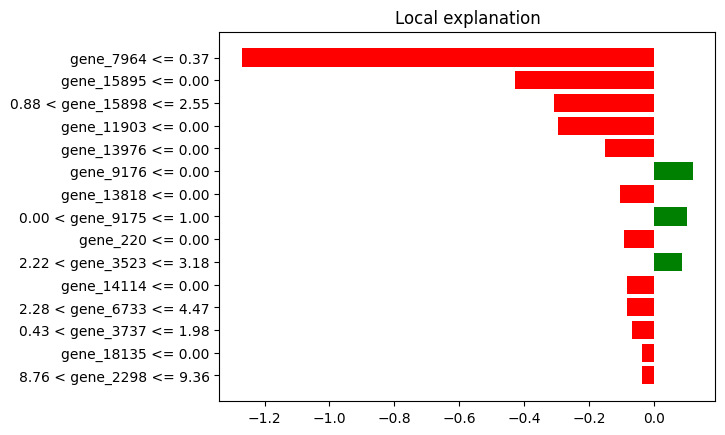

In [38]:
# Choose the 5th instance and use it to predict the results
j = 5
exp = explainer.explain_instance(X_test.values[j], SVM.predict, num_features=15)

# Show the predictions
fig = exp.as_pyplot_figure()

plt.savefig("LIME_SVM.png")

# Select 15th instance

In [97]:
# Choose the 15th instance and use it to predict the results
j = 15
exp = explainer.explain_instance(X_test.values[j], SVM.predict, num_features=15)

# Show the predictions
exp.show_in_notebook(show_table=True)

C:\Users\dania\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Intercept -0.015138264355482144
Prediction_local [0.04807838]
Right: 3


# Select 25th instance

In [98]:
# Choose the 15th instance and use it to predict the results
j = 25
exp = explainer.explain_instance(X_test.values[j], SVM.predict, num_features=15)

# Show the predictions
exp.show_in_notebook(show_table=True)

C:\Users\dania\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Intercept 0.0
Prediction_local [0.]
Right: 0


# SHAP

In [39]:
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
import shap

shap.initjs()
%matplotlib inline


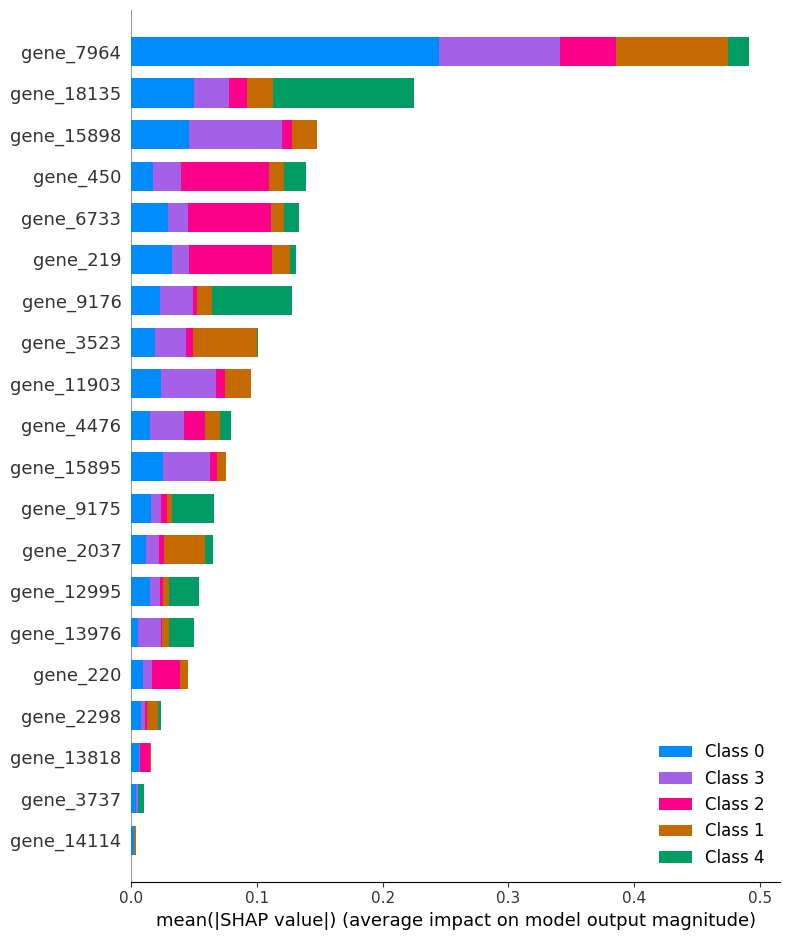

In [42]:
RF_explainer = shap.TreeExplainer(RF)
RF_shap_values = RF_explainer.shap_values(X)
shap.summary_plot(RF_shap_values, X) 

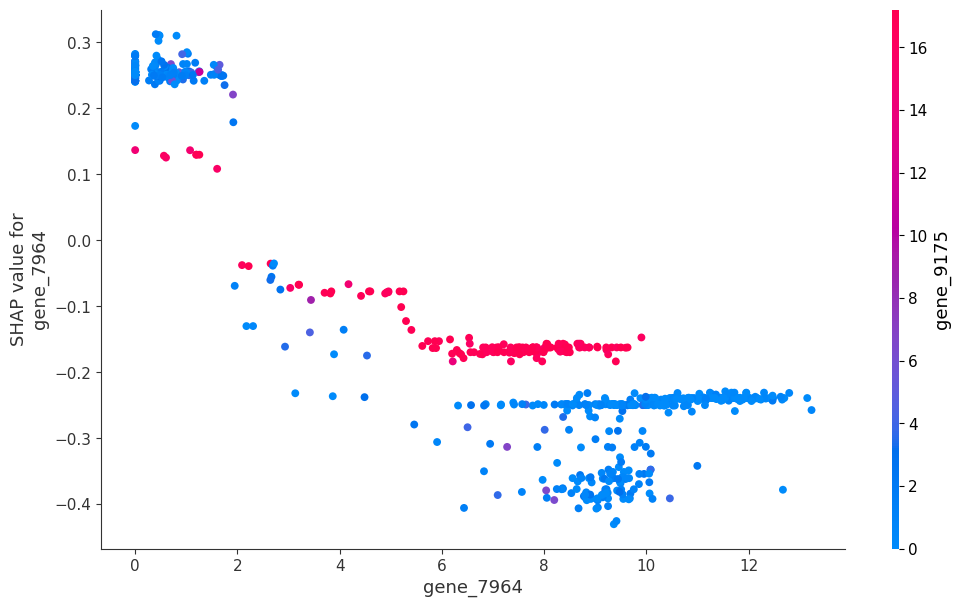

In [45]:
shap.dependence_plot('gene_7964', RF_shap_values[0], X, dot_size=32, show=False)

pl.gcf().set_size_inches(12, 7)

In [ ]:
SVM_explainer = shap.TreeExplainer(SVM)
SVM_shap_values = SVM_explainer.shap_values(X)